<a href="https://colab.research.google.com/github/yogisanhari/machine-learning/blob/main/Sentiment_Analysis_with_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis with Support Vector Machine (SVM)**


> by Yogi Sanhari



# **Dataset Background**

The dataset that will be used is the sentiment analysis dataset from IndoNLU. This is a special dataset for Indonesian-language sentiments that previously had gone through the pre-processing stage. This dataset is a collection of texts or documents in Indonesian language obtained through a crawling process (the process of extracting data from the web with a large size). Some text sources include Twitter, Zomato, TripAdvisor, Facebook, Instagram, and Qraved. The data were then annotated by several Indonesian language experts.<br>
This dataset covers various topics such as political issues, social activities, e-commerce, ordering applications, food, etc. Each data set has gone through language preprocessing such as emoticon deletion and word normalization.

# **Data Preparation**

> Source Data : https://github.com/IndoNLP/indonlu/tree/master/dataset/smsa_doc-sentiment-prosa

In [ ]:
# import library
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report

In [ ]:
# clone dataset from IndoNLU github
!git clone https://github.com/indobenchmark/indonlu

fatal: destination path 'indonlu' already exists and is not an empty directory.


In [ ]:
# load dataset
data_train = pd.read_csv('/content/indonlu/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv', sep='\t')
data_train.head()

,"warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !",positive
0,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
1,lokasi strategis di jalan sumatera bandung . t...,positive
2,betapa bahagia nya diri ini saat unboxing pake...,positive
3,duh . jadi mahasiswa jangan sombong dong . kas...,negative
4,"makanan beragam , harga makanan di food stall ...",positive


*Dataset has no header, need to create data header to differentiate between text content and target label.*

In [ ]:
# create data header
data_train = pd.read_csv('/content/indonlu/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv', sep='\t', names=["comment", "rating"])
data_test = pd.read_csv('/content/indonlu/dataset/smsa_doc-sentiment-prosa/valid_preprocess.tsv', sep='\t', names=["comment", "rating"])

In [ ]:
# show data train
data_train

,comment,rating
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [ ]:
# show data test
data_test

,comment,rating
0,"meski masa kampanye sudah selesai , bukan bera...",neutral
1,tidak enak,negative
2,restoran ini menawarkan makanan sunda . kami m...,positive
3,lokasi di alun alun masakan padang ini cukup t...,positive
4,betapa bejad kader gerindra yang anggota dprd ...,negative
...,...,...
1255,"film tncfu , tidak cocok untuk penonton yang t...",negative
1256,"indihome ini mahal loh bayar nya . hanya , pen...",negative
1257,"be de gea , cowok cupu yang takut dengan pacar...",negative
1258,valen yang sangat tidak berkualitas . konentat...,negative


In [ ]:
# show number of train and test data
print(data_train.shape)
print(data_test.shape)

(11000, 2)
(1260, 2)


*Dataset has 11,000 train data and 1,260 test data with **comment and rating** characteristics*

# **Exploratory Data Analysis**

## Distribution of Rating Data

In [ ]:
# counting number of data for each variable in rating column data_train
data_train['rating'].value_counts()

positive    6416
negative    3436
neutral     1148
Name: rating, dtype: int64

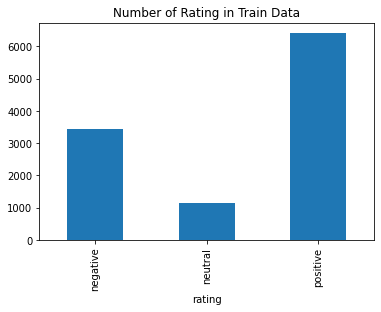

In [ ]:
# visualization distribution of data for each variable in rating column data_train
data_train.groupby('rating').size().plot(kind='bar', title="Number of Rating in Train Data")

*Based on chart train data has unbalanced data, but it is not significant problem because it will train comment labeled with sentiments one by one.*

In [ ]:
# counting number of data for each variable in rating column data_test
data_test['rating'].value_counts()

positive    735
negative    394
neutral     131
Name: rating, dtype: int64

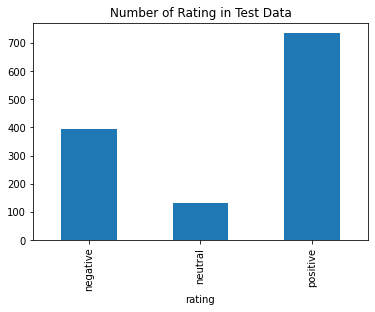

In [ ]:
# visualization distribution of data for each variable in rating column data_test
data_test.groupby('rating').size().plot(kind='bar', title="Number of Rating in Test Data")

*Based on chart test data has unbalanced data, but it is not significant problem because it will test comment labeled with sentiments one by one.*

##  Text Length of Comment Data

Text(0.5, 1.0, 'Text Length of Comment in Train and Test Data')

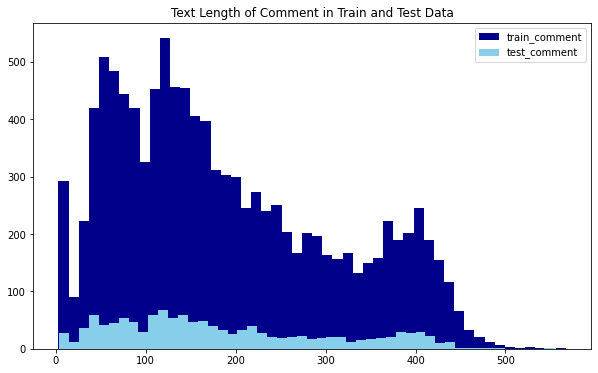

In [ ]:
# Visualization of text length in train and test data
 
length_train = data_train['comment'].str.len()
length_test = data_test['comment'].str.len()

plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="train_comment", color = "darkblue")
plt.hist(length_test, bins=50, label='test_comment', color = "skyblue")
plt.legend()
plt.title("Text Length of Comment in Train and Test Data")

## Sentiments of Comment Data

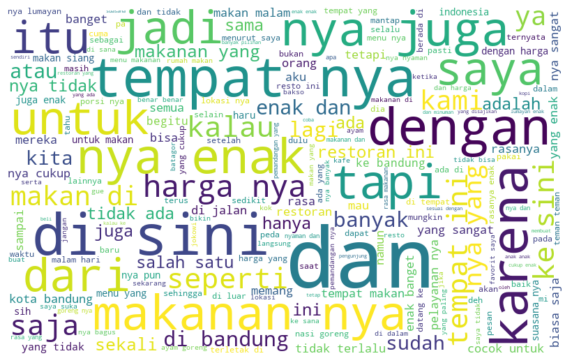

In [ ]:
# Sentiments in all train data can be seen by understanding common words with word cloud plots
 
def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
 
all_words = ' '.join([text for text in data_train['comment']])
wordCloud(all_words)

*These words that appear most often in train data, there are several keywords such as **enak, tapi, harga, tempat, makanan**.*

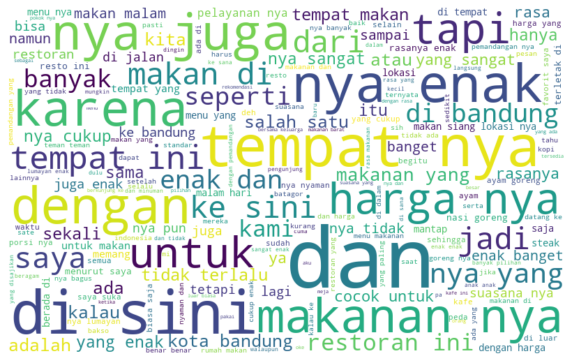

In [ ]:
# view positive words in data_train
positive_words = ' '.join(text for text in data_train['comment'][data_train['rating'] == 'positive']) 
wordCloud(positive_words)

*Some interesting words like **“enak”, “tempat”, “makanan”** often appear as a representation of positive sentiments.*

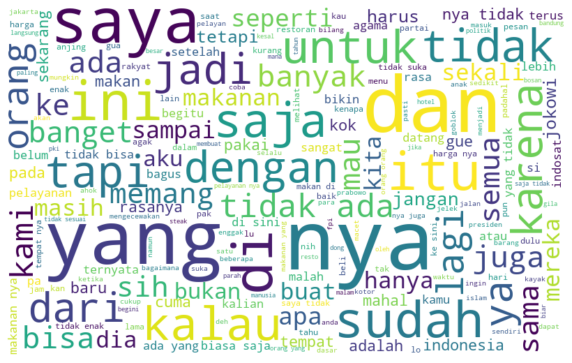

In [ ]:
# view negative words in data_train
negative_words = ' '.join(text for text in data_train['comment'][data_train['rating'] == 'negative']) 
wordCloud(negative_words)

*Some interesting words like **“tidak”, “tapi”, “saja”** often appear as a representation of negative sentiments.*

# **Data Pre-Processing**

*Feature Engineering with Term Frequency-Inverse Document Frequency (TF-IDF). Besides vectorizes data, TF-IDF also tokenizes data. So, it is no need to tokenize again.*

In [ ]:
# vectorization process to extract features with TF-IDF
vectorizer = TfidfVectorizer(min_df = 5,                                        # ignore terms that appear in less than 5 documents
                             max_df = 0.8,                                      # ignore terms that appear more than 80% in the text
                             sublinear_tf = True,                               # normalization bias for long text and short text
                             use_idf = True)                                    # term that appears too often in the text will be given a score less than terms that appear infrequently

train_vectors = vectorizer.fit_transform(data_train['comment'])                 # provide return value in form of document-term matrix
test_vectors = vectorizer.transform(data_test['comment'])                       # transform documents into document-term matrix

In [ ]:
# view train vector value
print(train_vectors)

  (0, 858)	0.07637049523741272
  (0, 237)	0.15109787697218033
  (0, 894)	0.060936546094434454
  (0, 1651)	0.15421430944783843
  (0, 3936)	0.05691989644819672
  (0, 2673)	0.041674425723943795
  (0, 2085)	0.2145440146925309
  (0, 1558)	0.11738430560139437
  (0, 3883)	0.11664723580859972
  (0, 827)	0.08532723440535711
  (0, 1389)	0.07377379261655719
  (0, 1482)	0.11317779622907188
  (0, 3460)	0.14471694731136528
  (0, 3486)	0.14557054051474394
  (0, 263)	0.10386832212863897
  (0, 3509)	0.09908165684043081
  (0, 2007)	0.11236167404789696
  (0, 4051)	0.14736506500322966
  (0, 1079)	0.13455469920124125
  (0, 432)	0.20923444978986025
  (0, 4079)	0.14954101061928382
  (0, 2450)	0.13828741176244957
  (0, 2461)	0.1410007189183509
  (0, 1536)	0.20481434997043935
  (0, 2274)	0.19341622406726763
  :	:
  (10999, 2158)	0.07305954902515958
  (10999, 3317)	0.18676062470497026
  (10999, 345)	0.08570769369706024
  (10999, 3526)	0.14224898903713865
  (10999, 328)	0.08900142005954341
  (10999, 1717)	0.1293

In [ ]:
# view test vector value
print(test_vectors)

  (0, 4064)	0.39116095517942684
  (0, 3949)	0.318775518059854
  (0, 3683)	0.14766193471723577
  (0, 3461)	0.3075827005632948
  (0, 3125)	0.27512049015602874
  (0, 2509)	0.2919469889165151
  (0, 2211)	0.275737188836178
  (0, 1669)	0.36769190870792534
  (0, 1350)	0.2587949428368911
  (0, 1155)	0.37794387362894916
  (0, 661)	0.21678342198902092
  (1, 3936)	0.6751760660425974
  (1, 1163)	0.7376566137731309
  (2, 4171)	0.05033247018965522
  (2, 4088)	0.16919114724584863
  (2, 3814)	0.18582357001453578
  (2, 3789)	0.21649343928474968
  (2, 3742)	0.12686266258286696
  (2, 3708)	0.12513808104979607
  (2, 3360)	0.16757218343009656
  (2, 3228)	0.0990019251396018
  (2, 3171)	0.09555345172789129
  (2, 3141)	0.1759068835940129
  (2, 2622)	0.23776035864482647
  (2, 2591)	0.1237176047171073
  :	:
  (1259, 4171)	0.18419729924449205
  (1259, 3813)	0.10828351453930445
  (1259, 3694)	0.16575800262874343
  (1259, 3358)	0.182310948894555
  (1259, 3228)	0.1518289672400413
  (1259, 3171)	0.14654040183167721


# **Modeling**

*Sentiment Classification with Support Vector Machine (SVM) Algorithm*

In [ ]:
# create classification with SVM
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, data_train['rating'])
prediction_linear = classifier_linear.predict(test_vectors)

In [ ]:
# view classification report metric test data
target_names = ['positive', 'negative', 'neutral']
print(classification_report(data_test['rating'], prediction_linear, target_names=target_names))

              precision    recall  f1-score   support

    positive       0.81      0.86      0.84       394
    negative       0.79      0.70      0.74       131
     neutral       0.92      0.91      0.91       735

    accuracy                           0.87      1260
   macro avg       0.84      0.82      0.83      1260
weighted avg       0.87      0.87      0.87      1260



*The rating metric results have consistent value for precision, recall, f1-score on each rating with accuracy value above 87%.*

# **Evaluation**

*Sentiment predictions with some example sentences to test the model.*

In [ ]:
comment = """Bahagia hatiku melihat pernikahan putri sulungku yang cantik jelita"""
comment_vector = vectorizer.transform([comment]) # vectorizing
print(classifier_linear.predict(comment_vector))

['positive']


*The words **"cantik"** and **"jelita"** are two words that have positive connotation, this sentence has a **positive sentiment**.*

In [ ]:
teks = """Ronaldo pergi ke Mall Grand Indonesia membeli cilok"""
teks_vector = vectorizer.transform([teks]) # vectorizing
print(classifier_linear.predict(teks_vector))

['neutral']


In [ ]:
teks = """Sayang, aku marah"""
teks_vector = vectorizer.transform([teks]) # vectorizing
print(classifier_linear.predict(teks_vector))

['negative']


*The words **"sayang"** and **"marah"** are two words that have positive and negative connotations, respectively. When viewed from context of sentence, this sentence has a **negative sentiment**.*

In [ ]:
teks = """Merasa kagum dengan toko ini tapi berubah menjadi kecewa setelah transaksi"""
teks_vector = vectorizer.transform([teks]) # vectorizing
print(classifier_linear.predict(teks_vector))

['negative']


*The words **"kagum"** and **"kagum"** are two words that have positive and negative connotations, respectively. When viewed from context of sentence, this sentence has a **negative sentiment**.*